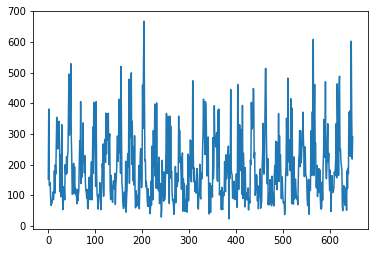

('Var:', 0.36583698)


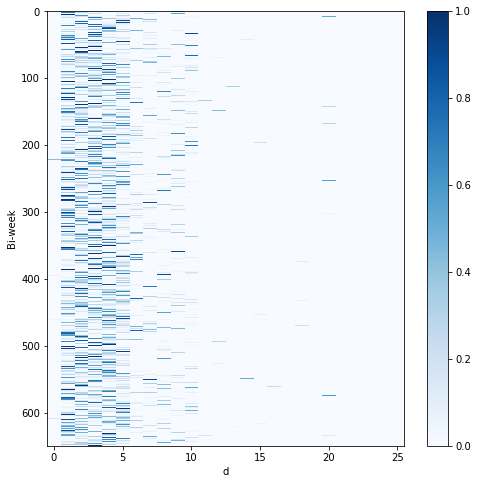

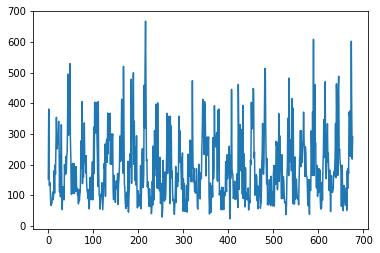

0.0
[[  0.   3.  27.   0.  39.   0.   0.   0.   0.  84.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 353.   0.   0.   0.   0.   0.  28.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  94.  35.   2.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  26.   0.  16.   0.  22.   0.  69.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   7.   0.  51.  52.   0.   0.   0.  31.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  87.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   3.  41.   0.   3.  20.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   4.   5.   0.   1.  27.  29.   0.   1.   0.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from contextlib import contextmanager
import os
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            

import csv 
import sys

def sim_data(D,r,doPlot):
    os.system("Rscript blrp.R")
    ts = []
    skipFirst = 0
    with open('simData.csv', 'rb') as csvfile:
        for line in csvfile.readlines():
            if skipFirst >= 1:
                ts.append(int(line.split(',')[1]))
            skipFirst += 1
    plt.plot(ts)
    plt.show()
        

    arr_list = ts

    sim_n_t_d = []
    for i in range(len(ts)):

        if np.random.binomial(1,.1) == 1 and i % 26 ==0 :
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            
            i+=4
        elif np.random.binomial(1,.1) == 1 and i % 11 == 0 :
            
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            i+=4
        elif np.random.binomial(1,.1) == 1 and i % 16 == 0 :
            
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            i+=4
        else:
            rand_dir = [.005*np.ones(1),.25*np.ones(5),.05*np.ones(5),.001*np.ones(10),.0001*np.ones(D-21)]
            rand_dir =  np.random.dirichlet(np.hstack(rand_dir))
        
            tmp1 = np.random.multinomial(ts[i],rand_dir,size=D).tolist()[0]
            sim_n_t_d.append(tmp1)

    sim_n_t_d = np.array(sim_n_t_d,dtype=np.float32)
    #print (sim_n_t_d)
    p_hat_sim = []
    from matplotlib.pyplot import cm

    for i in range(len(arr_list)):
        #print (sum(sim_n_t_d[i]/np.sum(sim_n_t_d[i])))
        p_hat_sim.append(sim_n_t_d[i]/np.sum(sim_n_t_d[i]))


    if doPlot == True:
        print ("Var:",np.sum(np.var(p_hat_sim,axis=0)))
        plt.figure(figsize=(8,8))
        plt.ylabel("Bi-week")
        plt.xlabel("d")
        plt.imshow(p_hat_sim,aspect='auto',cmap=cm.Blues)
        plt.legend()
        plt.colorbar()
        plt.show()

        plt.plot(sim_n_t_d.sum(axis=1))
        plt.show()

    sim_n_t_d = sim_n_t_d.reshape((-1,D))
    return sim_n_t_d,np.linalg.det(np.cov(p_hat_sim))

sim_data_1,var = sim_data(26,10,True)
print (var)
np.set_printoptions(threshold=np.nan)

print (sim_data_1)

In [5]:
np.arange(5-1,-1,-1)

array([4, 3, 2, 1, 0])

In [37]:
import numpy as np
import emcee
from scipy.stats import binom
from scipy.stats import norm
import pymc3 as pm
import numpy as np


def bayes_estimate(po_data,m2,phat,LO):
    count = LO
    print (len(po_data),len(m2))
    ret_arr = []
    for row in np.arange(LO,0,-1):
        print (m2[D-row],po_data[D-row],sum(phat[:count]))
        with pm.Model() as model:
            tmp = np.max((m2[(D-row)],po_data[D-row]))
            x = pm.Normal('x', mu=tmp, sd=10)
            z = pm.Binomial('z', n=tmp,p=sum(phat[:count]),observed=po_data[D-row])
        
        with model:
            trace = pm.sample(10000)
            
        ret_arr.append(trace['x'])
        count -=1
    
    return ret_arr

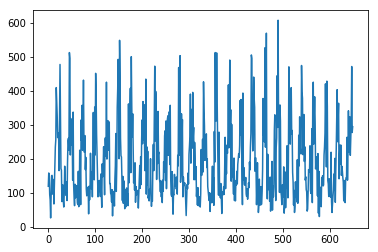

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock


Backward smoothing completed.
[240. 151. 178. 165. 145. 132.  76. 136. 106.  71. 136. 144. 144. 263.
 137. 214. 341. 220. 287. 323. 210. 259. 312. 471. 277. 294.]
(26, 26)
(150.35, 190.0, 0.7216387396777039)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 32%|███▏      | 3372/10500 [00:02<00:05, 1326.75it/s]


(173.54, 85.0, 0.5219273631043053)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:05<00:00, 2089.75it/s]


(150.61, 16.0, 0.34618776557363906)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:05<00:00, 2003.85it/s]


(146.64, 0.0, 0.18985007616451535)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:05<00:00, 1815.96it/s]


(135.86, 0.0, 0.003768139180630161)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:05<00:00, 1918.91it/s]


IndexError: tuple index out of range

In [147]:
from scipy.special import expit
import matplotlib.pyplot as plt

variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

import os
D=26
rmse_vec_cv = []
#with suppress_stdout():
rmse_vec = []
sim_data_var = []
for sim_num in np.arange(10):
            sim_n_t_d,sim_var = sim_data(D,10,False)
            sim_data_var.append(sim_var)
            train = sim_n_t_d[600:]
            process_train = sim_n_t_d[:600]


            train = np.array(train)
            train_n_t_d = train.reshape((-1,D))
            ts = train_n_t_d.sum(axis=1)
            data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]




            delayed_data = []
            count = D
            for i in range(len(data_to_be_scaled_down)):
                tmp = data_to_be_scaled_down[i][:count].tolist()
                while len(tmp) <D:
                    tmp.append(0)
                delayed_data.append(tmp)
                count -=1 


            training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

            k = np.array(train_n_t_d).shape[1 ]
            p_vec_noise = np.ones(k)

            for i in range(len(ts)-D):
                p_vec_noise += train_n_t_d[i]

            p_vec_noise = p_vec_noise/np.sum(p_vec_noise)
           
            #######
            # MODEL 1: Delay
            ########
            
            model_1_delay = []
            count = D
            for i in range(len(delayed_data)):
                delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
                model_1_delay.append(np.round(delay_forecast,2))
                count -= 1
            model_1_delay = np.array(model_1_delay)



            #######
            # MODEL 2 : Forecast
            ########
            
            LO=5
            process_training_data_end = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
            process_training_data = np.append(process_train,process_training_data_end)
            from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
            myDLM = dlm(process_training_data)
           # myDLM = myDLM + seasonality(26, name='7day', w=1.0)
            myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
            myDLM.fit()
            (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)
            
            #######
            # MODEL 2
            ########
            
            model_2_delay = []
            count = D
            for i in np.arange(LO,0,-1):
                tmp = process_model_forecast[LO-i]#bayes_estimate(p_vec_noise[:i],process_model_forecast[LO-i],predictVar[i],delayed_data[len(delayed_data)-i],.1)
                model_2_delay.append(np.round(tmp,2))
                count -= 1

            model_2_delay = np.append(model_1_delay[:D-LO],model_2_delay)
            
            print (ts[len(ts)-D:])
            model_average = np.mean(bayes_estimate(np.sum(delayed_data,axis=1),model_2_delay,p_vec_noise,LO),axis=1)
            model_average = np.append(model_1_delay[:(D-LO)],model_average)
            
            cut_blah = D-LO
            mse_1 = mean_squared_error(model_1_delay[cut_blah:],ts[len(ts)-D+cut_blah:])
            mse_2 = mean_squared_error(model_2_delay[cut_blah:],ts[len(ts)-D+cut_blah:])
            mse_3 = mean_squared_error(model_average[cut_blah:],ts[len(ts)-D+cut_blah:])

            rmse_vec.append([mse_1,mse_2,mse_3])

rmse_vec_cv.append(np.mean(rmse_vec,axis=0))



        

In [36]:
np.set_printoptions(suppress=True)
rmse_vec = np.array(rmse_vec)
from scipy import stats
print stats.mode(rmse_vec)
print (rmse_vec_cv)

print (rmse_vec_cv)

ModeResult(mode=array([[11779.34892   ,  1171.03482   ,  1178.20677014]]), count=array([[1, 1, 1]]))
[array([34425.130824  ,  5456.399738  ,  4612.19769273])]
[array([34425.130824  ,  5456.399738  ,  4612.19769273])]


In [143]:
def bayes_estimate_prob(po_data,m2,alphas,LO,N_SIM):
    ret_arr = []
    phat = alphas/sum(alphas)
    for s_ in range(N_SIM):
        count = LO
        print s_
        for row in np.arange(LO,0,-1):
            with pm.Model() as model:
                tmp = np.max((m2[s_][(D-row)],po_data[D-row]))
                x = pm.Normal('x', mu=tmp, sd=10)
                z = pm.Binomial('z', n=tmp,p=sum(phat[:count]),observed=po_data[D-row])

            with model:
                start = pm.find_MAP()
                step = pm.Metropolis()
                trace = pm.sample(5000, step, start=start)


            ret_arr.append(trace['x'][100:])
            count -=1
    
    return ret_arr

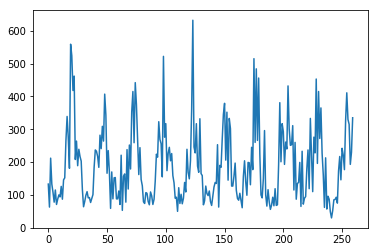

Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.
0


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -6.3036, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 439.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6751.02it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 570.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6436.07it/s]
logp = -105.47, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 407.83it/s]
100%|██████████| 5500/5500 [00:01<00:00, 5351.51it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -349.75, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 477.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8006.66it/s]
logp = -3.8767, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 477.90it/s]
100%|██████████| 5500/5500 [00:01<00:00, 3386.59it/s]


1


logp = -24.038, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 432.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6526.36it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -161.73, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 562.43it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5968.42it/s]
logp = -89.577, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 767.48it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7556.71it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -385.63, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 620.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8242.38it/s]
logp = -4.2457, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 594.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10210.96it/s]


2


logp = -6.4716, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 406.68it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9595.16it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 676.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9252.03it/s]
logp = -112.08, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 710.00it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8253.50it/s]
logp = -315.19, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 403.80it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4711.58it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.9366, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 699.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6701.23it/s]


3


logp = -7.067, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 242.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7002.27it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 393.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7505.23it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -44.869, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 665.82it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7513.29it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 593.09it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8193.37it/s]
logp = -4.5255, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 178.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6339.41it/s]


4


logp = -11.236, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 521.65it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7396.26it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -162.44, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 597.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8658.17it/s]
logp = -85.404, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 371.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8660.03it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 519.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9037.74it/s]
logp = -4.3654, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 289.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7983.29it/s]


5


logp = -36.903, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 583.43it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9103.88it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 614.82it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6355.83it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -61.473, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 628.74it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9369.59it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 684.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8359.91it/s]
logp = -4.2399, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 671.36it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8888.70it/s]


6


logp = -8.5259, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 573.07it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9218.48it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 304.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8699.05it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -166.17, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 497.78it/s]
100%|██████████| 5500/5500 [00:01<00:00, 5331.42it/s]
logp = -231.43, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 658.08it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8017.89it/s]
logp = -3.5614, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 493.83it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7628.12it/s]


7


logp = -77.487, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 628.50it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8336.31it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 688.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9592.53it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -118.15, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 708.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9457.58it/s]
logp = -190.42, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 511.63it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8348.57it/s]
logp = -4.4774, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 563.22it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9422.48it/s]


8


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 618.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8700.81it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 267.03it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8162.99it/s]
logp = -51.354, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 778.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7896.76it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 462.87it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7822.17it/s]
logp = -3.9813, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 443.07it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8356.40it/s]


9


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 600.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7957.69it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 492.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8658.12it/s]
logp = -117.11, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 496.78it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8831.30it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -332.29, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 510.47it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9764.10it/s]
logp = -3.8769, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 491.28it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8391.50it/s]


10


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 545.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9750.77it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 670.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8893.84it/s]
logp = -190.06, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 212.49it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8044.97it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -366.99, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 368.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8408.89it/s]
logp = -4.08, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 606.24it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9235.25it/s]


11


logp = -12.16, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 684.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9058.48it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 637.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8576.68it/s]
logp = -98.628, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 339.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9132.89it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 649.32it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7262.55it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.5598, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 467.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6122.93it/s]


12


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 270.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5735.27it/s]
logp = -125.23, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 74.78it/s]
100%|██████████| 5500/5500 [00:03<00:00, 1785.10it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -162.7, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 739.08it/s]
100%|██████████| 5500/5500 [00:01<00:00, 3588.80it/s]
logp = -189.9, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 180.98it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6302.42it/s]
logp = -4.6136, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 658.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6254.41it/s]


13


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -27.44, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 422.66it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4388.06it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 325.52it/s]
100%|██████████| 5500/5500 [00:01<00:00, 2868.69it/s]
logp = -188.97, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 192.09it/s]
100%|██████████| 5500/5500 [00:01<00:00, 3271.27it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 602.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5517.98it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.706, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 546.13it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4689.94it/s]


14


logp = -8.048, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 71.62it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4365.43it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 146.03it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4123.84it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -96.666, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 490.56it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4444.14it/s]
logp = -236.14, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 213.08it/s]
100%|██████████| 5500/5500 [00:02<00:00, 2488.17it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.3096, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 721.23it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9259.31it/s]


15


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 493.59it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8172.73it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 309.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8785.62it/s]
logp = -162.94, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 593.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8732.04it/s]
logp = -241.79, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 602.98it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8616.79it/s]
logp = -3.3503, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 507.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8536.74it/s]


16


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -21.777, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 490.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9012.17it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 457.64it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8490.37it/s]
logp = -106.08, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 531.50it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6616.40it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 535.91it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8799.14it/s]
logp = -3.3804, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 445.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8256.30it/s]


17


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -28.537, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 535.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9307.58it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 520.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9361.07it/s]
logp = -131.71, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 406.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8982.39it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 404.11it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8210.71it/s]
logp = -4.8082, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 431.58it/s]
100%|██████████| 5500/5500 [00:01<00:00, 3009.79it/s]


18


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -28.594, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 341.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5912.89it/s]
logp = -147.96, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 633.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9030.49it/s]
logp = -76.585, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 595.23it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8429.93it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9686.56it/s]
logp = -4.115, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 388.49it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9256.63it/s]


19


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 666.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9245.03it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 729.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9355.11it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -119.39, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 679.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8998.87it/s]
logp = -356.53, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 488.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9509.14it/s]
logp = -3.3053, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 543.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9346.86it/s]


20


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 700.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9608.95it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 488.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9624.20it/s]
logp = -58.776, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 506.47it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7084.64it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 534.03it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8123.88it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.5756, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 66.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5835.52it/s]


21


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 242.28it/s]
100%|██████████| 5500/5500 [00:01<00:00, 5034.91it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 489.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5709.27it/s]
logp = -111.21, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 636.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8850.20it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 599.87it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9772.20it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.5509, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 440.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 5681.75it/s]


22


logp = -6.3876, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 517.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7959.73it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 523.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7333.52it/s]
logp = -59.936, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 516.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9584.10it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -210.79, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 390.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9770.38it/s] 
logp = -4.5923, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 200.32it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9739.34it/s] 


23


logp = -51.172, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 711.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10371.37it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 669.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10274.09it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -198.18, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 614.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10469.17it/s]
logp = -274.24, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 467.62it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10112.84it/s]
logp = -4.5533, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 617.08it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10654.45it/s]


24


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 770.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9879.70it/s] 
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 760.80it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9984.91it/s] 
logp = -71.501, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 701.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9745.64it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -329.43, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 658.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9945.34it/s]
logp = -4.4393, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 629.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10231.59it/s]


25


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 615.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9909.13it/s]
logp = -140.27, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 684.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10360.90it/s]
logp = -67.424, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 586.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10660.94it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -367.89, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 599.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10141.48it/s]
logp = -4.722, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 712.71it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9954.09it/s]


26


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 651.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10415.72it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 674.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10360.64it/s]
logp = -80.771, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 656.59it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10239.36it/s]
logp = -298.93, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 498.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10495.90it/s]
logp = -4.0363, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 592.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8771.82it/s]


27


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 751.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8746.95it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 730.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9425.21it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -127.17, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 604.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8519.13it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 580.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8460.52it/s]
logp = -4.7051, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 610.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9283.95it/s]


28


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 577.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9547.25it/s] 
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 497.01it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9839.09it/s]
logp = -166.36, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 406.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9264.70it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -288.53, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 683.56it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8705.97it/s]
logp = -3.6322, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 615.00it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9420.11it/s]


29


logp = -34.468, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 674.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9254.04it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 440.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8319.81it/s]
logp = -168.63, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 582.42it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9060.27it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 530.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8888.11it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.8588, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 653.83it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9778.68it/s]


30


logp = -8.2442, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 735.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8973.16it/s]
logp = -178.83, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 245.88it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8907.72it/s]
logp = -131.1, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 542.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10287.57it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 735.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10280.67it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.2704, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 710.24it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10259.91it/s]


31


logp = -37.575, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 670.50it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10090.02it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 537.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10598.69it/s]
logp = -69.635, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 685.85it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10319.08it/s]
logp = -356.93, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 579.84it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10474.31it/s]
logp = -3.5345, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 686.80it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9656.14it/s]


32


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -67.448, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 604.80it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9932.87it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 677.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 11024.49it/s]
logp = -93.737, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 739.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10159.22it/s]
logp = -272.2, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 685.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10242.89it/s]
logp = -4.2082, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 570.61it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10330.28it/s]


33


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 699.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9588.98it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 680.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10156.41it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -109, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 625.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10912.24it/s]
logp = -245.28, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 552.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10151.61it/s]
logp = -4.526, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 648.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10317.71it/s]


34


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 729.13it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10607.35it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 596.63it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10305.63it/s]
logp = -90.234, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 654.85it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10483.94it/s]
logp = -289.62, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 603.84it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10373.27it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.9555, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 658.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10661.60it/s]


35


logp = -14.548, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10361.19it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 636.56it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10263.57it/s]
logp = -85.614, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 747.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10927.07it/s]
logp = -388.02, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 740.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9717.86it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.1784, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 634.11it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10433.96it/s]


36


logp = -61.415, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 582.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10714.48it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 560.85it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10660.96it/s]
logp = -146.2, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 305.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10930.55it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 663.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10277.90it/s]
logp = -4.3022, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 681.89it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9919.71it/s] 


37


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -9.1516, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 603.15it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10647.05it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 777.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9839.44it/s]
logp = -65.213, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 565.61it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10707.62it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 577.37it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10308.64it/s]
logp = -3.8785, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10049.55it/s]


38


logp = -20.758, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 547.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8571.43it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 592.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9363.39it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -104.65, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 653.57it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9103.05it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 518.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9014.93it/s]
logp = -3.9132, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 747.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8706.53it/s]


39


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 539.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7935.64it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 582.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6833.39it/s]
logp = -227.43, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 410.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8658.16it/s]
logp = -270.14, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 609.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9733.45it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.3655, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 677.27it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8248.25it/s]


40


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 594.89it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9434.48it/s]
logp = -170.58, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 576.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9844.41it/s]
logp = -23.053, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 718.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9233.93it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -374.19, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 663.13it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9956.30it/s]
logp = -4.4925, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 464.15it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8314.83it/s]


41


logp = -14.531, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 590.50it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9602.64it/s]
logp = -145.82, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 512.56it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7758.38it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -112.32, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 622.44it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9228.53it/s]
logp = -342.31, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 626.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9072.78it/s]
logp = -3.7224, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 386.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9193.61it/s]


42


logp = -9.9364, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 749.85it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9647.80it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 775.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9459.66it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -126.18, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 598.97it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9381.04it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 647.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8884.02it/s]
logp = -4.7977, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 655.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8553.86it/s]


43


logp = -6.2905, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 519.23it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9626.21it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 571.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9688.51it/s]
logp = -94.42, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 698.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9785.24it/s] 
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 601.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9474.71it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.4643, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 486.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9116.41it/s]


44


logp = -7.4992, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 521.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8298.96it/s]
logp = -115.24, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 526.99it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8897.87it/s]
logp = -80.184, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 668.68it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8988.84it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -303.15, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 455.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7980.28it/s]
logp = -4.506, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 524.78it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9553.09it/s]


45


logp = -53.932, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 381.61it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9805.86it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 645.18it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9652.26it/s]
logp = -43.993, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 723.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9378.59it/s]
logp = -364.1, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 291.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9524.00it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.8129, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 623.22it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9296.84it/s]


46


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 767.48it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9534.21it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 613.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8161.84it/s]
logp = -136.06, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 585.80it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9607.62it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 358.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8784.95it/s]
logp = -4.3615, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 540.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8931.30it/s]


47


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 612.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8895.05it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 526.03it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9104.86it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -90.347, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.49it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9664.21it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 615.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9876.52it/s] 
logp = -3.6526, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 649.57it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9282.17it/s]


48


logp = -15.582, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 625.22it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9834.67it/s]
logp = -184.21, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 454.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8997.90it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -90.142, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 711.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9171.82it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 633.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9197.76it/s]
logp = -4.4059, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 597.39it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9558.57it/s]


49


logp = -32.671, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 458.19it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9099.57it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 535.91it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8783.82it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -140.61, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 367.71it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9792.89it/s]
logp = -135.58, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 584.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8989.14it/s]
logp = -4.0904, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 497.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8677.90it/s]


50


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 314.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9201.54it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 474.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9229.61it/s]
logp = -131.2, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 573.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8771.60it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -259.93, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 679.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7235.97it/s]
logp = -4.2235, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 594.56it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9485.49it/s]


51


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 488.16it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9532.99it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 455.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9898.92it/s]
logp = -46.975, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 642.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9843.07it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -202.22, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 589.42it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8984.46it/s]
logp = -3.4657, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 695.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8933.34it/s]


52


logp = -74.226, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 559.91it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9228.79it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 658.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8792.05it/s]
logp = -122.83, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 675.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9391.10it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 449.43it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8657.03it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.1697, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 556.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9408.11it/s]


53


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 544.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9559.77it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 605.89it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8558.21it/s]
logp = -93.084, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 492.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8518.02it/s]
logp = -297.91, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 483.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8192.13it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.8244, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 498.88it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8648.36it/s]


54


logp = -22.132, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 701.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8777.11it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 666.87it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9411.38it/s]
logp = -167.45, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 521.23it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9285.13it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 640.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9568.53it/s]
logp = -3.6285, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 551.59it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9261.67it/s]


55


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -18.892, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 643.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9544.07it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 682.11it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9425.72it/s]
logp = -86.266, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 595.74it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8628.73it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 410.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9417.42it/s]
logp = -3.9729, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 569.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9035.78it/s]


56


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 572.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8547.31it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 718.39it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8665.24it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -54.502, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 593.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9649.45it/s]
logp = -315.17, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9282.31it/s]
logp = -4.4415, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 648.32it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9245.97it/s]


57


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 586.86it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9476.04it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 562.13it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8992.86it/s]
logp = -149.18, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 679.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9361.70it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -309.25, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 736.36it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9242.25it/s]
logp = -4.0047, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 498.25it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9160.13it/s]


58


logp = -6.9753, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 807.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8196.79it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 638.79it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8822.81it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -133.5, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 649.32it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9300.50it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 482.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8548.75it/s]
logp = -3.9441, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 558.20it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8815.11it/s]


59


logp = -9.8525, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 717.83it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9297.15it/s]
logp = -121.02, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 500.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9352.42it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -65.112, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 550.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9358.58it/s]
logp = -253.21, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 553.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9541.91it/s]
logp = -4.3954, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 618.45it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9329.05it/s]


60


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -11.913, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 483.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8498.90it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 747.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8696.93it/s]
logp = -71.225, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 540.54it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9228.16it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 529.82it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9062.10it/s]
logp = -3.6407, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 620.32it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8929.53it/s]


61


logp = -7.5376, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 529.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9586.83it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 690.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8876.99it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -111.7, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 388.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8538.52it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 532.91it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9399.99it/s]
logp = -3.9046, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 637.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8904.39it/s]


62


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 559.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9209.65it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 477.44it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8136.41it/s]
logp = -113.93, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 680.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8555.80it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.53it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9596.14it/s]
logp = -4.2935, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 779.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9392.19it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock


63


logp = -41.704, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 580.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9072.91it/s]
logp = -66.235, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 678.64it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9361.05it/s]
logp = -112.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 642.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9285.16it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -200.97, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 498.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9242.73it/s]
logp = -3.9946, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 524.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9186.49it/s]


64


logp = -6.6553, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 458.59it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9699.84it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 637.53it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9920.04it/s]
logp = -161.95, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 542.74it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9653.54it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 607.74it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9883.64it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.0221, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 620.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9479.16it/s]


65


logp = -48.174, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 722.84it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9427.22it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 671.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9382.77it/s]
logp = -164.95, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 632.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9695.53it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 627.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8573.76it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.1475, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 624.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9250.24it/s]


66


logp = -14.045, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 544.36it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8903.97it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 619.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9672.32it/s]
logp = -128.81, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 573.54it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9420.36it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 657.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9028.66it/s]
logp = -4.0384, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 524.91it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7641.72it/s]


67


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -6.7552, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.97it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8980.07it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 497.28it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9626.08it/s]
logp = -124.47, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 511.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 6030.71it/s]
logp = -212.26, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 476.30it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9104.26it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.858, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 765.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7512.65it/s]


68


logp = -7.9096, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 480.09it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8674.42it/s]
logp = -155.83, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 634.68it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8553.64it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -114.96, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 616.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9826.01it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 502.88it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9939.78it/s] 
logp = -4.7714, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 710.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9521.61it/s]


69


logp = -6.3389, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 725.41it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9585.99it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 643.89it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8230.08it/s]
logp = -125.33, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 368.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8424.29it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 649.78it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9268.82it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.3535, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 529.68it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9299.53it/s]


70


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 489.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9644.32it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 768.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8922.94it/s]
logp = -154.88, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 510.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8869.51it/s]
logp = -249.82, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 565.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9255.81it/s]
logp = -3.6257, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.49it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9436.89it/s]


71


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 507.88it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9733.67it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -77.067, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 535.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8949.13it/s]
logp = -79.983, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 645.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7648.08it/s]
logp = -248.29, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 459.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8750.45it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.6955, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 698.82it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8125.14it/s]


72


logp = -9.1387, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 585.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7212.17it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 598.25it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9237.77it/s]
logp = -63.663, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 484.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9276.58it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 538.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9360.44it/s]
logp = -3.7991, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 580.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9210.01it/s]


73


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 660.05it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8951.71it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 474.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8725.12it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -177.35, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 532.07it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9493.36it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 556.31it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9299.56it/s]
logp = -4.0976, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 391.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9610.57it/s]


74


logp = -22.006, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 303.63it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9015.71it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 606.60it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8898.80it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -126.88, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 606.24it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9683.10it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 477.19it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9438.78it/s]
logp = -3.9936, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 748.78it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8880.29it/s]


75


logp = -40.49, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 569.96it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9162.80it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 589.63it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9616.26it/s]
logp = -13.324, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 667.99it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8759.55it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -178.75, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 465.78it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9708.94it/s]
logp = -4.065, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 361.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8964.66it/s]


76


logp = -13.836, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 665.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9759.54it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 653.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8365.29it/s]
logp = -67.621, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 739.67it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9675.98it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -263.37, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 664.02it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9499.71it/s]
logp = -4.6179, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 506.19it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9381.44it/s]


77


logp = -7.0053, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 554.51it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9470.09it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 584.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8288.11it/s]
logp = -147.3, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 630.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9066.25it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -402.91, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 448.54it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9851.30it/s]
logp = -4.2957, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 748.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9247.69it/s]


78


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 483.80it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9746.35it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 465.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9634.33it/s]
logp = -98.694, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 634.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9077.12it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 538.49it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8612.01it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.7471, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 650.63it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9036.54it/s]


79


logp = -55.439, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 543.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9811.85it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 290.62it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9542.45it/s]
logp = -115.19, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 615.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9403.86it/s]
logp = -304.83, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 654.03it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8822.66it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.9328, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 371.95it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8077.47it/s]


80


logp = -28.094, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 591.87it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7685.54it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 561.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9574.04it/s]
logp = -151.76, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 686.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9581.43it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 612.75it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9208.36it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.2438, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 539.81it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8482.46it/s]


81


logp = -10.421, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 696.09it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8093.88it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 440.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9543.19it/s]
logp = -103.16, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 635.69it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9854.07it/s]
logp = -372.88, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 580.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8760.12it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.2063, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 785.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10503.92it/s]


82


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 686.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10281.28it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 704.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10002.00it/s]
logp = -150.58, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 647.47it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9326.21it/s]
logp = -321.96, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 744.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10160.29it/s]
logp = -4.4363, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 618.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10518.89it/s]


83


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -40.779, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 558.35it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7975.56it/s]
logp = -152.94, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 674.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9240.38it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -104.74, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 567.22it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9690.39it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 257.30it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9224.61it/s]
logp = -4.3281, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 530.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9481.94it/s]


84


logp = -26.961, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 709.94it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8938.34it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 697.31it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8729.38it/s]
logp = -57.856, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 346.21it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7981.08it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 324.52it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8030.27it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.223, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 574.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8940.70it/s]


85


logp = -64.632, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 581.25it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7180.08it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 514.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9636.22it/s]
logp = -147.57, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 712.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10429.47it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10439.42it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.2391, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 280.82it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9912.61it/s] 


86


logp = -16.506, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 727.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10216.80it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 651.24it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10700.27it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -90.606, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 644.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10738.58it/s]
logp = -367.26, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 562.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9610.18it/s]
logp = -4.2644, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 628.55it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10511.99it/s]


87


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -17.387, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 476.30it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9257.69it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 714.84it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8887.87it/s]
logp = -157.76, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 711.74it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9547.14it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 738.30it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9394.72it/s]
logp = -3.8344, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 776.72it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9406.82it/s]


88


logp = -6.4199, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 628.36it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9515.79it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 492.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9113.90it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -107.45, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 409.76it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9656.03it/s] 
logp = -250.85, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 735.00it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9521.01it/s]
logp = -4.325, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 569.14it/s]
100%|██████████| 5500/5500 [00:00<00:00, 7670.60it/s]


89


logp = -7.0664, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 761.01it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9794.97it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 526.59it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9911.54it/s] 
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -23.513, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 647.47it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9897.65it/s] 
logp = -261.37, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 692.99it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9899.88it/s] 
logp = -3.5643, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 758.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9889.45it/s]


90


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.27it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10009.33it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 657.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9598.44it/s]
logp = -86.236, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 557.12it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9827.20it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 728.87it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9068.07it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.0954, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 568.33it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8882.36it/s]


91


logp = -15.482, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 574.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10017.45it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 801.97it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10489.84it/s]
logp = -141.51, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 554.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10060.12it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 453.93it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9776.25it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.7274, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 381.39it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9878.80it/s] 


92


logp = -7.8971, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 677.48it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10008.75it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 762.53it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10109.81it/s]
logp = -78.954, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 150.07it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9616.61it/s]
logp = -331.51, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 737.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10000.82it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -4.535, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 576.06it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9984.37it/s]


93


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 552.61it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9283.34it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 586.17it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10253.75it/s]
logp = -88.867, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 474.36it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10010.83it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 554.62it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10039.94it/s]
logp = -4.1162, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 523.40it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10156.52it/s]


94


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 651.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9790.31it/s] 
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 478.01it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9032.13it/s]
logp = -44.891, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 532.04it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10287.11it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 776.44it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10064.58it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.8365, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 543.34it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9359.01it/s]


95


logp = -6.3466, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 622.85it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9049.63it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 606.64it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9855.78it/s]
logp = -155.5, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 730.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10097.49it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 760.46it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9966.35it/s] 
logp = -4.4085, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 672.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9614.56it/s]


96


INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -15.649, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 705.70it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9904.66it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 590.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9713.82it/s]
logp = -64.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 586.53it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9885.67it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 584.29it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10431.03it/s]
logp = -3.8282, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 502.28it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9762.52it/s]


97


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 660.73it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9923.81it/s] 
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 575.19it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9373.84it/s]
logp = -21.595, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 794.90it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10084.58it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -393.3, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 576.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9735.12it/s]
logp = -4.1149, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 666.66it/s]
100%|██████████| 5500/5500 [00:00<00:00, 8870.28it/s]


98


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 698.58it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9556.29it/s]
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 576.38it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9865.54it/s] 
logp = -91.871, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 588.26it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10055.67it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 622.67it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10092.26it/s]
INFO (theano.gof.compilelock): Refreshing lock /Users/gcgibson/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock
logp = -3.918, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 717.10it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9362.51it/s]


99


logp = -91.762, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 708.50it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9868.82it/s] 
logp = -219.41, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 639.62it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9174.11it/s]
logp = -120.51, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 524.09it/s]
100%|██████████| 5500/5500 [00:00<00:00, 9335.06it/s]
logp = -414.86, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 620.92it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10701.33it/s]
logp = -3.7715, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 411.77it/s]
100%|██████████| 5500/5500 [00:00<00:00, 10096.02it/s]


ValueError: cannot reshape array of size 50000 into shape (100,5)

In [130]:
from scipy.special import expit
import matplotlib.pyplot as plt

variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

import os
D=26
rmse_vec_cv = []
#with suppress_stdout():
rmse_vec = []
sim_data_var = []
N_SIM = 1000
sim_results = []
for sim_num in np.arange(100):
            sim_n_t_d,sim_var = sim_data(D,10,False)
            sim_data_var.append(sim_var)
            train = sim_n_t_d
            


            train = np.array(train)
            train_n_t_d = train.reshape((-1,D))
            ts = train_n_t_d.sum(axis=1)
            data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]




            delayed_data = []
            count = D
            for i in range(len(data_to_be_scaled_down)):
                tmp = data_to_be_scaled_down[i][:count].tolist()
                while len(tmp) <D:
                    tmp.append(0)
                delayed_data.append(tmp)
                count -=1 


            training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

            k = np.array(train_n_t_d).shape[1 ]
            alphas = np.ones(k)

            for i in range(len(ts)-D):
                alphas += train_n_t_d[i]

            
           
            #######
            # MODEL 1: Delay
            ########
            delay_model_samples = []
            for s_ in range(N_SIM):
                model_1_delay = []
                count = D
                p_vec_noise = np.random.dirichlet(alphas)
                for i in range(len(delayed_data)):
                    delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
                    model_1_delay.append(np.round(delay_forecast,2))
                    count -= 1
                delay_model_samples.append(model_1_delay)
            
            delay_model_samples = np.array(delay_model_samples)
            

            #######
            # MODEL 2 : Forecast
            ########
            
            LO=5
            process_training_data = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
            from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
            myDLM = dlm(process_training_data)
           # myDLM = myDLM + seasonality(26, name='7day', w=1.0)
            myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
            myDLM.fit()
            (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)
            
            #######
            # MODEL 2
            ########
            forecast_model_samples = []
            for s_ in range(N_SIM):
                model_2_delay = []
                count = D
                for i in np.arange(LO,0,-1):
                    tmp = np.random.normal(process_model_forecast[LO-i],np.sqrt(predictVar[LO-i]))
                    model_2_delay.append(np.round(tmp,2))
                    count -= 1

                forecast_model_samples.append(np.append(model_1_delay[:D-LO],model_2_delay))
            
            forecast_model_samples = np.array(forecast_model_samples)
            
            
            model_average = bayes_estimate_prob(np.sum(delayed_data,axis=1),forecast_model_samples,alphas,LO,N_SIM)
            
            model_average = np.transpose(np.array(model_average).reshape((-1,LO)))
            delay_model_samples = np.transpose(np.array(delay_model_samples))
            forecast_model_samples = np.transpose(np.array(forecast_model_samples))
            sim_results.append([delay_model_samples,forecast_model_samples,model_average]) 
           


        

In [131]:
model_average = np.transpose(np.array(model_average).reshape((N_SIM*100,LO)))
delay_model_samples = np.transpose(np.array(delay_model_samples))
forecast_model_samples = np.transpose(np.array(forecast_model_samples))

In [133]:

delay_sim_res = delay_model_samples
fcast_sim_res = forecast_model_samples
avg_sim_res =model_average

print (delay_sim_res.shape,fcast_sim_res.shape,avg_sim_res.shape)

((26, 100), (26, 100), (5, 10000))


In [142]:
LO_av = avg_sim_res
LO_delay = delay_sim_res[D-LO:]
LO_fcast = fcast_sim_res[D-LO:]
LO_truth = ts[len(ts)-LO:]

av_cp = 0
fcast_cp = 0
delay_cp = 0
for i in range(LO):
    LO_av_ci = np.round(np.percentile(LO_av[i],[2.5,97.5]))
    LO_fcast_ci = np.round(np.percentile(LO_fcast[i],[2.5,97.5]))
    LO_delay_ci = np.round(np.percentile(LO_delay[i],[2.5,97.5]))
    print (LO_delay_ci,LO_fcast_ci,LO_av_ci, LO_truth[i])
    if LO_av_ci[0] <= LO_truth[i] <= LO_av_ci[1]:
        av_cp +=1
        
    if LO_fcast_ci[0] <= LO_truth[i] <= LO_fcast_ci[1]:
        fcast_cp +=1
        
    if LO_delay_ci[0] <= LO_truth[i] <= LO_delay_ci[1]:
        delay_cp +=1

        
av_cp = 1.*av_cp/LO
fcast_cp = 1.*fcast_cp/LO
delay_cp = 1.*delay_cp/LO

print (delay_cp,fcast_cp,av_cp)


(array([335., 339.]), array([127., 441.]), array([ 86., 423.]), 230.0)
(array([630., 643.]), array([ 61., 375.]), array([ 86., 423.]), 335.0)
(array([0., 0.]), array([ 46., 426.]), array([ 86., 423.]), 193.0)
(array([1411., 1469.]), array([ 39., 373.]), array([ 85., 422.]), 230.0)
(array([0., 0.]), array([ 38., 398.]), array([ 85., 422.]), 335.0)
(0.0, 1.0, 1.0)
